#Business Understanding

Risiko kredit (credit risk) merupakan risiko kerugian yang terkait dengan kemungkinan kegagalan counterparty memenuhi kewajibannya atau secara mudahnya, risiko kredit adalah risiko bahwa Peminjam tidak membayar apa yang terutang. 
Oleh karena itu, penting untuk memprediksi risiko peminjam untuk membayar kembali pinjaman. Tujuan dari Risiko Kredit adalah untuk memaksimalkan Tingkat Pengembalian yang disesuaikan dengan Risiko dari Lembaga Keuangan dengan mempertahankan Eksposur Risiko Kredit dalam parameter yang dapat diterima.
karena itu, penggunaan machine learning dapat membantu dalam proses prediksi secara otomatis.

#Data Requirement

Dataset of customer loan from financial company from 2007-2014

**Import Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/loan_data_2007_2014.csv')
df.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Data Understanding


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

##Checking Missing Value

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
percent_missing

Unnamed: 0                       0.000000
id                               0.000000
member_id                        0.000000
loan_amnt                        0.000000
funded_amnt                      0.000000
funded_amnt_inv                  0.000000
term                             0.000000
int_rate                         0.000000
installment                      0.000000
grade                            0.000000
sub_grade                        0.000000
emp_title                        5.916553
emp_length                       4.505399
home_ownership                   0.000000
annual_inc                       0.000858
verification_status              0.000000
issue_d                          0.000000
loan_status                      0.000000
pymnt_plan                       0.000000
url                              0.000000
desc                            72.981546
purpose                          0.000000
title                            0.004289
zip_code                         0

In [6]:
full_non_null = [col for col in df.columns if df[col].isnull().all()]
print(full_non_null)
print(len(full_non_null),"column(s)")

['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
17 column(s)


In [7]:
df = df.drop(axis=1, columns=full_non_null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)
dtypes=[df[col].dtype for col in df.columns]
df_missing_value = pd.DataFrame({'data_type':dtypes,
                                 'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', inplace=True)
df_missing_value

,data_type,percent_missing
Unnamed: 0,int64,0.000000
policy_code,int64,0.000000
purpose,object,0.000000
zip_code,object,0.000000
addr_state,object,0.000000
dti,float64,0.000000
last_pymnt_amnt,float64,0.000000
collection_recovery_fee,float64,0.000000
recoveries,float64,0.000000
total_rec_late_fee,float64,0.000000


sudah tdak ditemukannya missing value/null value

Missing values < 1%:
*   title object
*   inq_last_6mths
*   delinq_2yrs
*   last_pymnt_d = Last month payment was received
*   revol_util = Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit
*   open_acc = The number of open credit lines in the borrower's credit file
*   last_credit_pull_d = The most recent month LC pulled credit for this loan
*   pub_rec = Number of derogatory public records
*   total_acc = The total number of credit lines currently in the borrower's credit file
*   earliest_cr_line = The month the borrower's earliest reported credit line was opened
*   collections_12_mths_ex_med = Number of collections in 12 months excluding medical collections
*   acc_now_delinq = The number of accounts on which the borrower is now delinquent

Missing values 1% - 20%
* emp_length = Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* emp_title = The job title supplied by the Borrower when applying for the loan
* total_rev_hi_lim = Total revolving high credit/credit limit
* tot_coll_amt = Total collection amounts ever owed
* tot_cur_bal = Total current balance of all accounts

Missing values 40% - 50%:
* next_payment_d = Last month payment was received

Missing values > 50%:
* mths_since_last_delinq = The number of months since the borrower's last delinquency
* desc = Loan description provided by the borrower
* mths_since_last_major_derog	 = Months since most recent 90-day or worse rating
* mths_since_last_record = The number of months since the last public record

##Checking Duplicated Data

In [9]:
df.duplicated().sum()

0

Tidak ditemukannya data yang duplikat

#DATA PREPARATION

##Handling Missing Values

In [10]:
df = df[df.columns[~df.columns.isin(['mths_since_last_record','desc','next_pymnt_d'])]]

In [11]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN


###Imputation

In [12]:
for col in ['mths_since_last_major_derog','mths_since_last_delinq']:
    df[col] = df[col].fillna(0)

In [13]:
df[['mths_since_last_major_derog','mths_since_last_delinq']].isnull().sum()

mths_since_last_major_derog    0
mths_since_last_delinq         0
dtype: int64

In [14]:
for col in df.select_dtypes(exclude='object'):
    df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

Unnamed: 0                         0
id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                  29
i

In [15]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna(df[col].mode().iloc[0])
print("Total Update Missing Values")
df.isnull().sum()

Total Update Missing Values


Unnamed: 0                     0
id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
open_acc                       0
pub_rec   

In [16]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


##Checking Unique Values

In [17]:
print("Unique Features (Numerical)")
print(df.select_dtypes(exclude='object').nunique())

Unique Features (Numerical)
Unnamed: 0                     466285
id                             466285
member_id                      466285
loan_amnt                        1352
funded_amnt                      1354
funded_amnt_inv                  9854
int_rate                          506
installment                     55622
annual_inc                      31901
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
mths_since_last_delinq            145
open_acc                           62
pub_rec                            26
revol_bal                       58142
revol_util                       1269
total_acc                         112
out_prncp                      135665
out_prncp_inv                  141189
total_pymnt                    351609
total_pymnt_inv                347659
total_rec_prncp                172713
total_rec_int                  270249
total_rec_late_fee               5808
recoveries            

Unnamed: 0, id, dan member_id adalah kolom yang unik untuk setiap baris


policy_code hanya mempunyai 1 nilai unik

In [18]:
print("Unique Features (Categorical)")
print(df.select_dtypes(exclude=['int','float']).nunique())

Unique Features (Categorical)
term                        2
grade                       7
sub_grade                  35
emp_title              205475
emp_length                 11
home_ownership              6
verification_status         3
issue_d                    91
loan_status                 9
pymnt_plan                  2
url                    466285
purpose                    14
title                   63099
zip_code                  888
addr_state                 50
earliest_cr_line          664
initial_list_status         2
last_pymnt_d               98
last_credit_pull_d        103
application_type            1
dtype: int64


application_type hanya memiliki 1 nilai unik

last_credit_pull_d,last_pymnt_d,issue_d,addr_state memiliki setidaknya 500 nilai unik

emp_title, url,title, zip_code, earliest_cr_line memiliki lebih dari 500 nilai unik


In [19]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
def word_strip(x):
  return x.strip()

In [21]:
df["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [22]:
df["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [23]:
df["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [24]:
df["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [25]:
df["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [26]:
df["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

##Formatting Target Variable

loan_status merupakan variabel target

In [27]:
df["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Good Loan (1) : Fully Paid, Does not meet the credit policy. Status:Fully Paid, Current, In Grace Period, Late (16-30 days)

Bad Loan (0) : Charged Off, Does not meet the credit policy. Status:Charged Off, Default, Late (31-120 days)

In [28]:
#Define a dictionary for encoding target variable
target_dict = {'Fully Paid':1,
               'Does not meet the credit policy. Status:Fully Paid':1,
               'Charged Off':0,
               'Does not meet the credit policy. Status:Charged Off':0,
               'Default':0,
               'Late (31-120 days)':0,
               'Current':1,
               'In Grace Period':1,
               'Late (16-30 days)':1}
#Create the mapped values in a new column
df['loan_status'] = df['loan_status'].map(target_dict)
#Review dataset
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0


##Datetime setting

In [29]:
#Bulan dimana batas kredit paling awal yang dilaporkan peminjam dibuka
df['earliest_cr_line'].value_counts()

Oct-00    3703
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Jul-55       1
Feb-57       1
Oct-54       1
May-53       1
Nov-56       1
Name: earliest_cr_line, Length: 664, dtype: int64

In [30]:
#LC bulan terakhir menarik kredit untuk pinjaman ini
df['last_credit_pull_d'].value_counts()

Jan-16    327741
Dec-15     13992
Nov-15      8384
Sep-15      8051
Oct-15      7957
Jul-15      7351
Aug-15      6574
Jun-15      6214
Apr-15      5698
Mar-15      5479
May-15      5353
Jan-15      5141
Feb-15      4830
Dec-14      3686
Oct-14      3358
Nov-14      3168
Sep-14      2961
Aug-14      2812
Jul-14      2773
May-14      2290
Jun-14      2236
Mar-14      2204
Apr-14      2191
Feb-14      1931
Jan-14      1793
Feb-13      1446
Nov-13      1412
Dec-13      1395
Oct-13      1273
Sep-13      1063
Aug-13      1048
Mar-13      1038
Jul-13      1020
May-13       997
Jun-13       853
Apr-13       836
Dec-12       576
Nov-12       576
Sep-12       525
Oct-12       515
Aug-12       505
Feb-12       420
Mar-12       402
May-12       388
Jul-12       384
Jun-12       376
Apr-12       360
Mar-11       335
Aug-11       305
Jan-12       286
Dec-11       279
Nov-11       227
May-11       227
Feb-11       210
Jun-11       204
Jul-11       186
Apr-11       185
Sep-11       184
Jan-11       1

In [31]:
#Pembayaran bulan lalu telah diterima
df['last_pymnt_d'].value_counts()

Jan-16    179996
Dec-15     62000
Jul-15     11703
Oct-15     11248
Sep-15     10204
Mar-15     10087
Jun-15     10078
Apr-15     10051
Aug-15      9939
May-15      9618
Nov-15      9317
Jan-15      8611
Feb-15      8488
Oct-14      7676
Dec-14      7253
Sep-14      6316
Jul-14      6312
Aug-14      6305
Nov-14      6206
Jun-14      5620
May-14      4721
Mar-14      4572
Apr-14      4327
Jan-14      3655
Feb-14      3632
Dec-13      3050
Oct-13      2832
Nov-13      2662
Aug-13      2515
Sep-13      2510
Jul-13      2395
May-13      2170
Mar-13      2070
Jun-13      1987
Apr-13      1910
Feb-13      1614
Jan-13      1479
Oct-12      1268
Nov-12      1198
Dec-12      1198
Aug-12      1134
Sep-12      1125
Jul-12       962
Mar-12       951
May-12       878
Jun-12       861
Apr-12       860
Feb-12       803
Mar-11       596
Dec-11       585
Jan-12       575
Apr-11       519
Sep-11       491
Nov-11       487
Oct-11       482
Aug-11       479
Jul-11       454
May-11       448
Jun-11       4

In [32]:
#Bulan dimana pinjaman issued
df['issue_d'].value_counts()

Oct-14    38782
Jul-14    29306
Nov-14    25054
May-14    19099
Apr-14    19071
Aug-14    18814
Jun-14    17179
Mar-14    16513
Jan-14    15628
Feb-14    15269
Dec-13    15020
Nov-13    14676
Oct-13    14114
Sep-13    12987
Aug-13    12674
Jul-13    11910
Jun-13    10899
Sep-14    10606
May-13    10350
Dec-14    10307
Apr-13     9419
Mar-13     8273
Feb-13     7561
Jan-13     6872
Nov-12     6382
Oct-12     6263
Sep-12     6087
Dec-12     6066
Aug-12     5419
Jul-12     4627
Jun-12     3817
May-12     3400
Apr-12     3230
Mar-12     2914
Jan-12     2602
Feb-12     2560
Dec-11     2267
Nov-11     2232
Oct-11     2118
Sep-11     2067
Aug-11     1934
Jul-11     1875
Jun-11     1835
May-11     1704
Apr-11     1563
Mar-11     1448
Jan-11     1380
Dec-10     1335
Feb-11     1298
Oct-10     1232
Nov-10     1224
Jul-10     1204
Sep-10     1189
Aug-10     1175
Jun-10     1105
May-10      989
Apr-10      912
Mar-10      828
Feb-10      682
Jan-10      662
Nov-09      662
Dec-09      658
Oct-09  

In [33]:
df[['issue_d','last_pymnt_d','last_credit_pull_d']].head()

,issue_d,last_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-15,Jan-16
1,Dec-11,Apr-13,Sep-13
2,Dec-11,Jun-14,Jan-16
3,Dec-11,Jan-15,Jan-15
4,Dec-11,Jan-16,Jan-16


In [34]:
def date_time(dt):
  if dt.year > 2016:
    dt = dt.replace(year=dt.year-100)
  return dt

In [35]:
#Bulan dimana batas kredit paling awal yang dilaporkan peminjam dibuka
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

#Bulan dimana pinjaman issued
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x: date_time(x))
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y') 

#Pembayaran bulan lalu telah diterima
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y') 

#LC bulan terakhir menarik kredit untuk pinjaman ini
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y') 

df[['earliest_cr_line','issue_d','last_pymnt_d','last_credit_pull_d']].head()

,earliest_cr_line,issue_d,last_pymnt_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2015-01-01,2016-01-01
1,1999-04-01,2011-12-01,2013-04-01,2013-09-01
2,2001-11-01,2011-12-01,2014-06-01,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01,2016-01-01


Kolom baru pada Datetime:
*   pymnt_time = jumlah bulan antara pinjaman yang issued (issue_d) dan pembayaran terakhir yang diterima (last_pymnt_d) 
*   credit_pull_year = jumlah tahun antara batas kredit paling awal yang dilaporkan peminjam dibuka (earliest_cr_line) dan LC terbaru menarik kredit untuk pinjaman ini (last_credit_pull_d)

In [36]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [37]:
def diff_year(d1, d2):
    return (d1.year - d2.year)

In [38]:
((df.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1) < 0)).any().any()

False

In [39]:
((df.apply(lambda x: diff_month(x.last_credit_pull_d, x.earliest_cr_line), axis=1) < 0)).any().any()

False

In [40]:
df['pymnt_time'] = df.apply(lambda x: diff_month(x.last_pymnt_d, x.issue_d), axis=1)
df['credit_pull_year'] = df.apply(lambda x: diff_year(x.last_credit_pull_d, x.earliest_cr_line), axis=1)
print('done')

done


In [41]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,49,20


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [43]:
#menyimpan data yang sudah dibersihkan
df.to_csv('df_cred.csv', index=False)
!cp 'df_cred.csv' '/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/'
print('done')

done


##Analysing Descriptive Statistics

In [44]:
df_cred = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/df_cred.csv')
df_cred.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,49,20


###Categorical Features

In [45]:
df_cred.describe(exclude=['int','float'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,url,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285,466285
unique,2,7,35,205475,11,6,3,91,2,466285,14,63099,888,50,664,2,98,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,2014-10-01,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,945xx,CA,2000-10-01,f,2016-01-01,2016-01-01,INDIVIDUAL
freq,337953,136929,31686,32987,171057,235875,168055,38782,466276,1,274195,164095,5304,71450,3703,303005,179996,327741,466285


###Numerical Features

In [46]:
df_cred.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.0,466285.000000,4.662850e+05,4.662850e+05,4.662850e+05,466285.000000,466285.000000
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327729e+04,0.890693,17.218758,0.284661,0.804695,15.793573,11.186995,0.160554,1.623020e+04,56.177985,25.064302,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009082,9.095913,1.0,0.004002,1.629893e+02,1.301714e+05,2.923681e+04,19.967507,18.276462
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496334e+04,0.312024,7.851121,0.797343,1.091583,22.557500,4.987380,0.510848,2.067625e+04,23.724005,11.599792,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108632,20.165675,0.0,0.068635,1.348289e+04,1.416729e+05,3.443264e+04,9.563030,7.318153
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,1.000000,11.360000,0.000000,0.000000,0.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,0.000000,1.0,0.000000,0.000000e+00,3.361100e+04,1.500000e+04,14.000000,13.000000
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,1.000000,16.870000,0.000000,0.000000,0.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,0.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04,18.000000,17.000000
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.895300e+04,1.000000,22.780000,0.000000,1.000000,28.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,0.000000,1.0,0.000000,0.000000e+00,1.849300e+05,3.430000e+04,26.000000,22.000000
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,1.000000,39.990000,29.000000,33.000000,188.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06,95.000000,72.000000


##Analysing Distribution Plot

In [47]:
df_cred.dtypes.value_counts()

float64    28
object     19
int64      10
dtype: int64

In [48]:
non_used = ['Unnamed: 0','id','member_id','policy_code', 'loan_status']
uni_dist = df_cred.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]

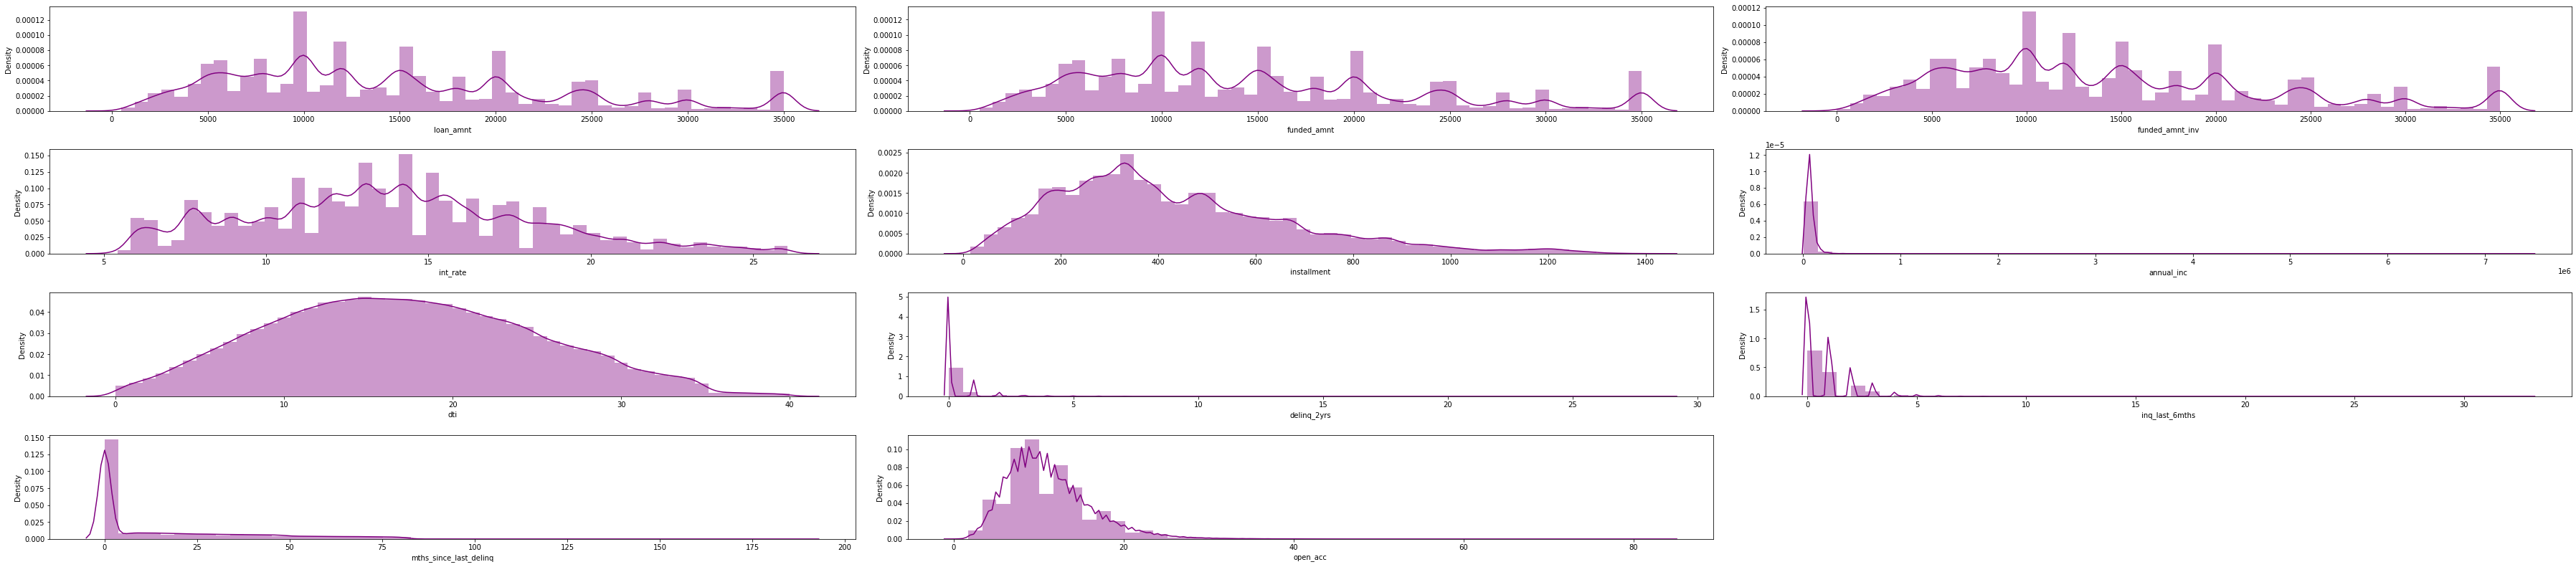

In [49]:
plt.figure(figsize=(50, 30))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='Purple')
    plt.tight_layout()

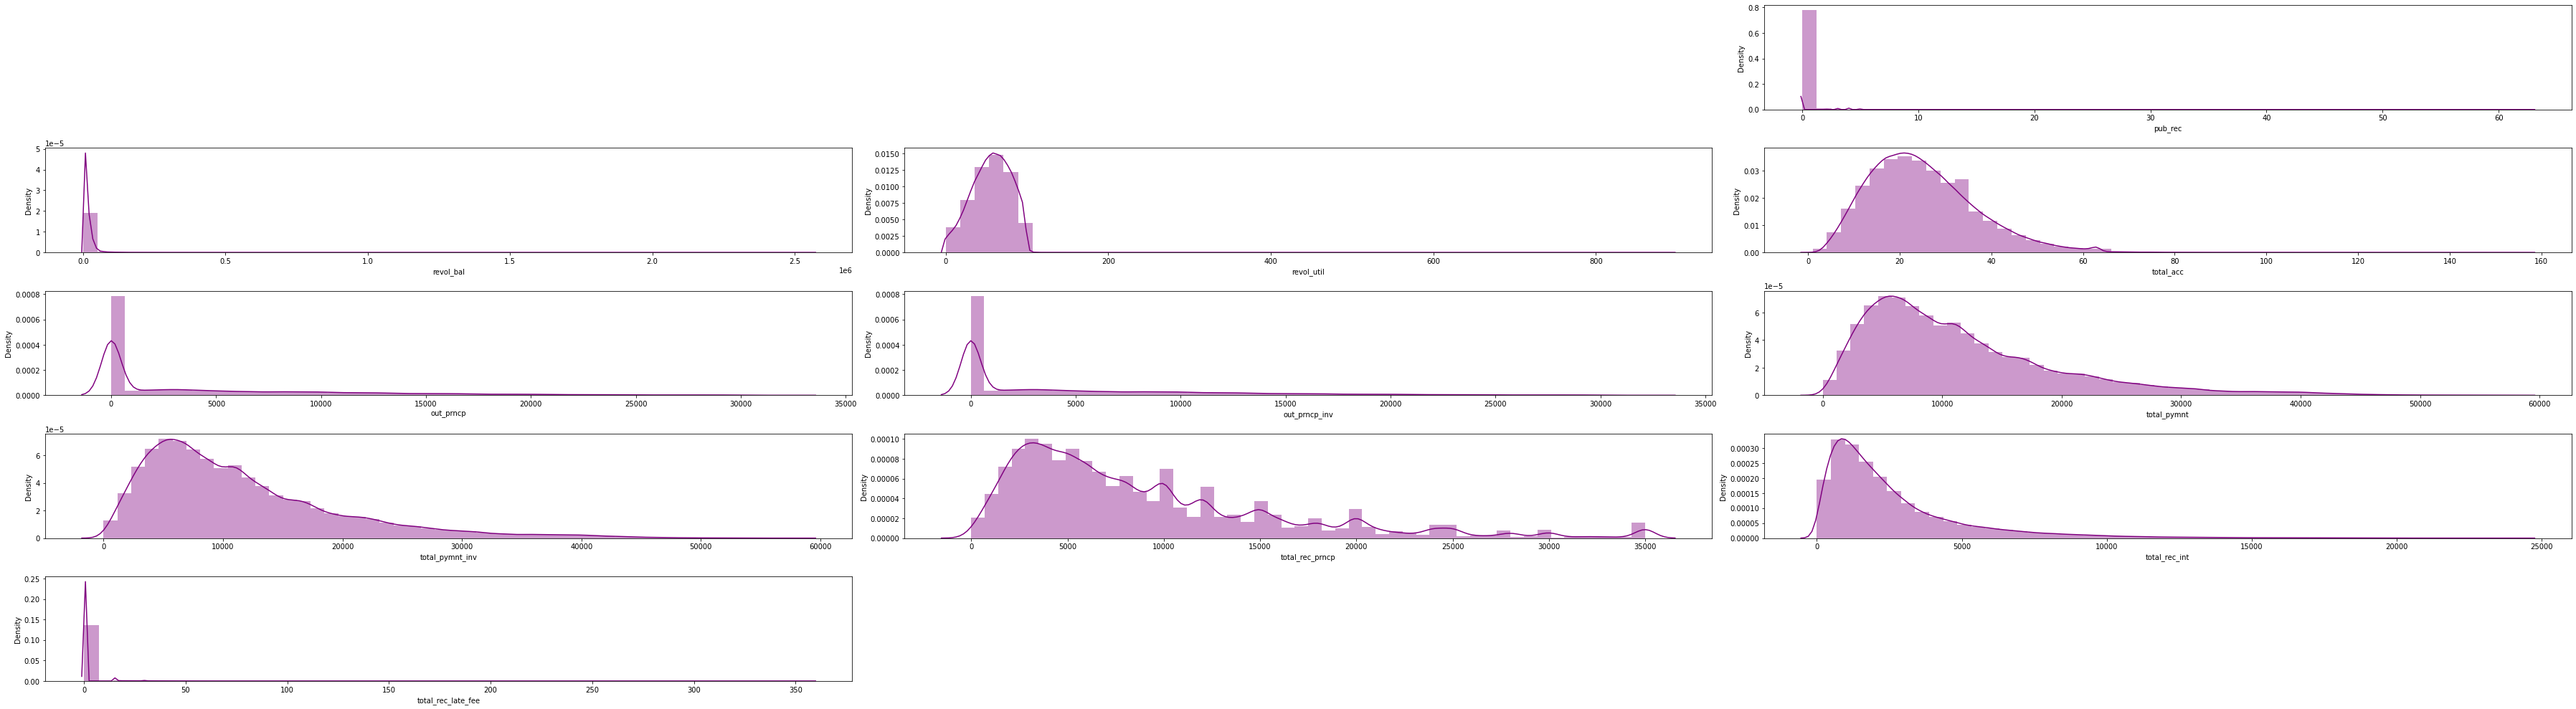

In [50]:
plt.figure(figsize=(50, 30))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='Purple')
    plt.tight_layout()

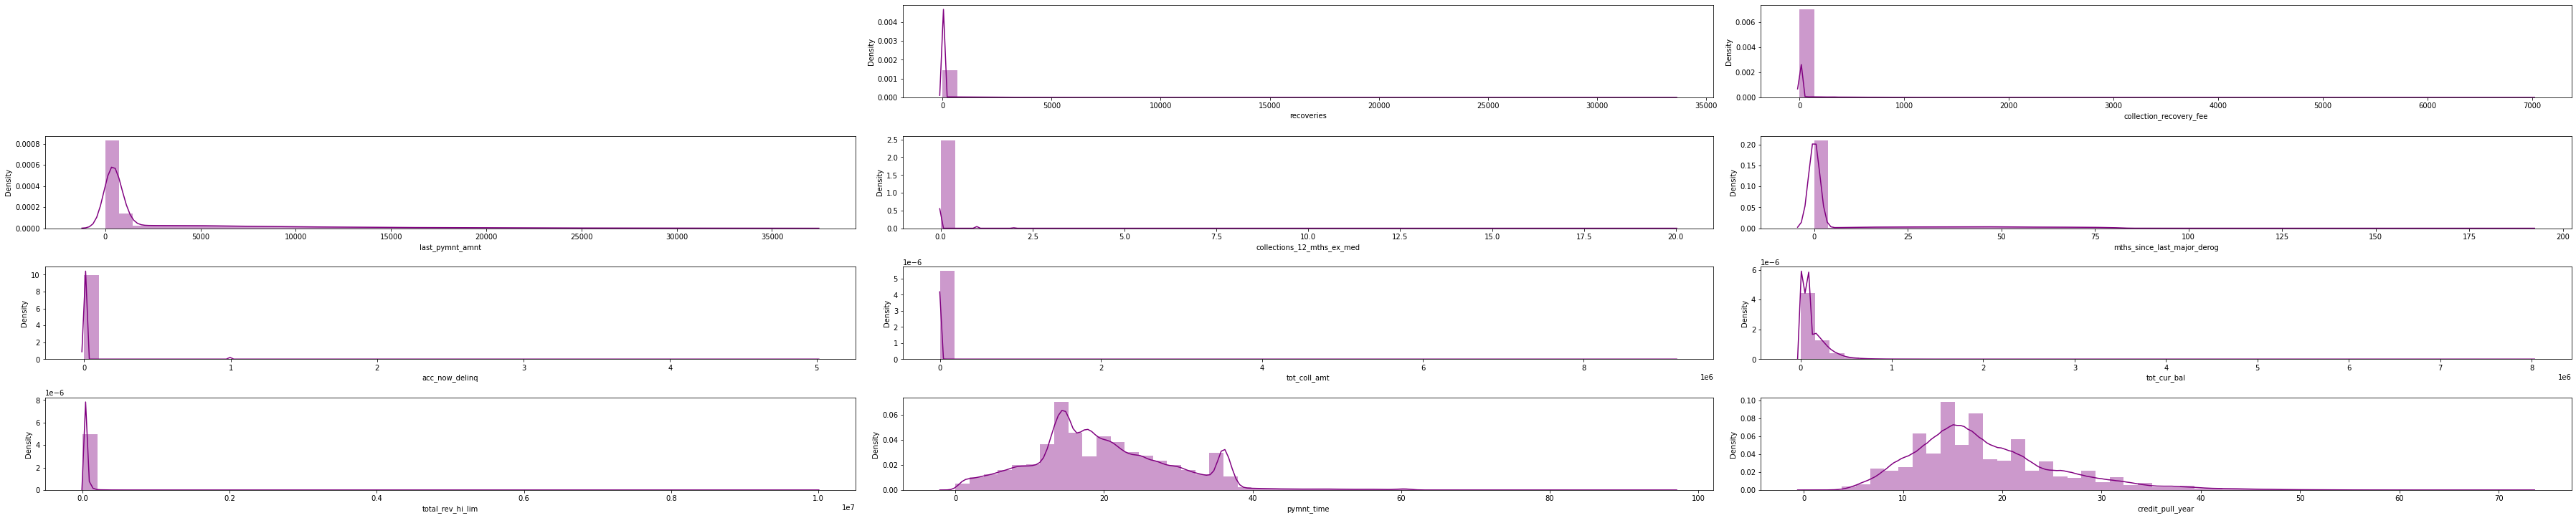

In [51]:
plt.figure(figsize=(50, 30))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.distplot(uni_dist.iloc[:,i], color='Purple')
    plt.tight_layout()

Dapat dilihat pada grafik diatas, beberapa Feature ada yang skewed, dan ada yang tidak skewed (loan_amnt,funded_amnt,funded_amnt_inv,int_rate,dti)


##Analysing Box Plot

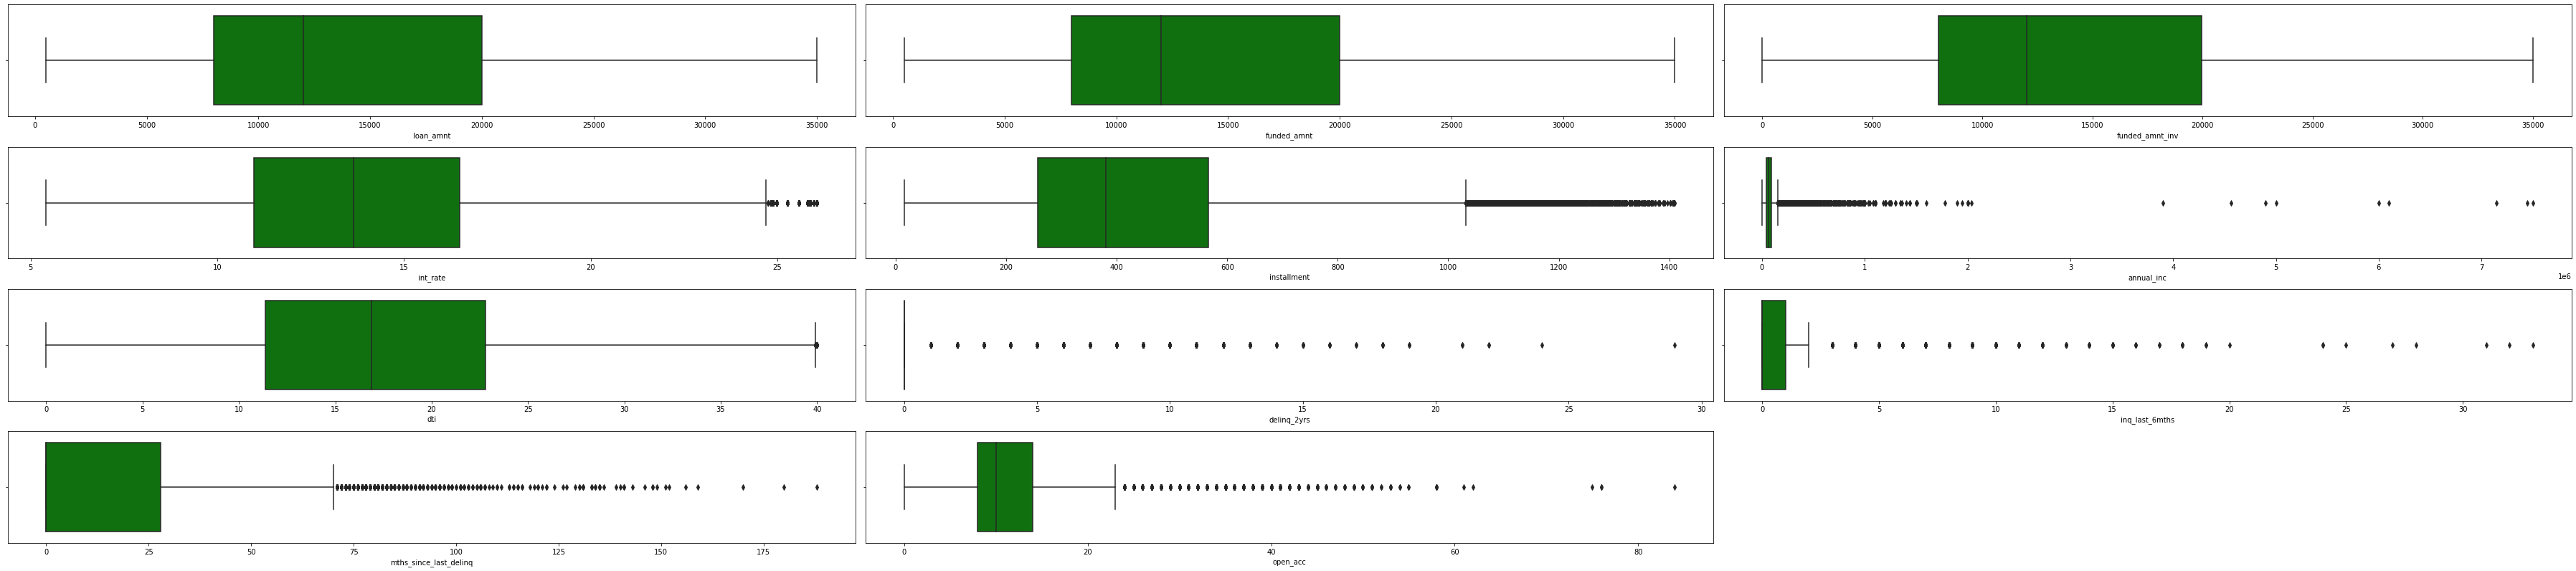

In [52]:
plt.figure(figsize=(50, 30))
for i in range(0, 11):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='Green')
    plt.tight_layout()

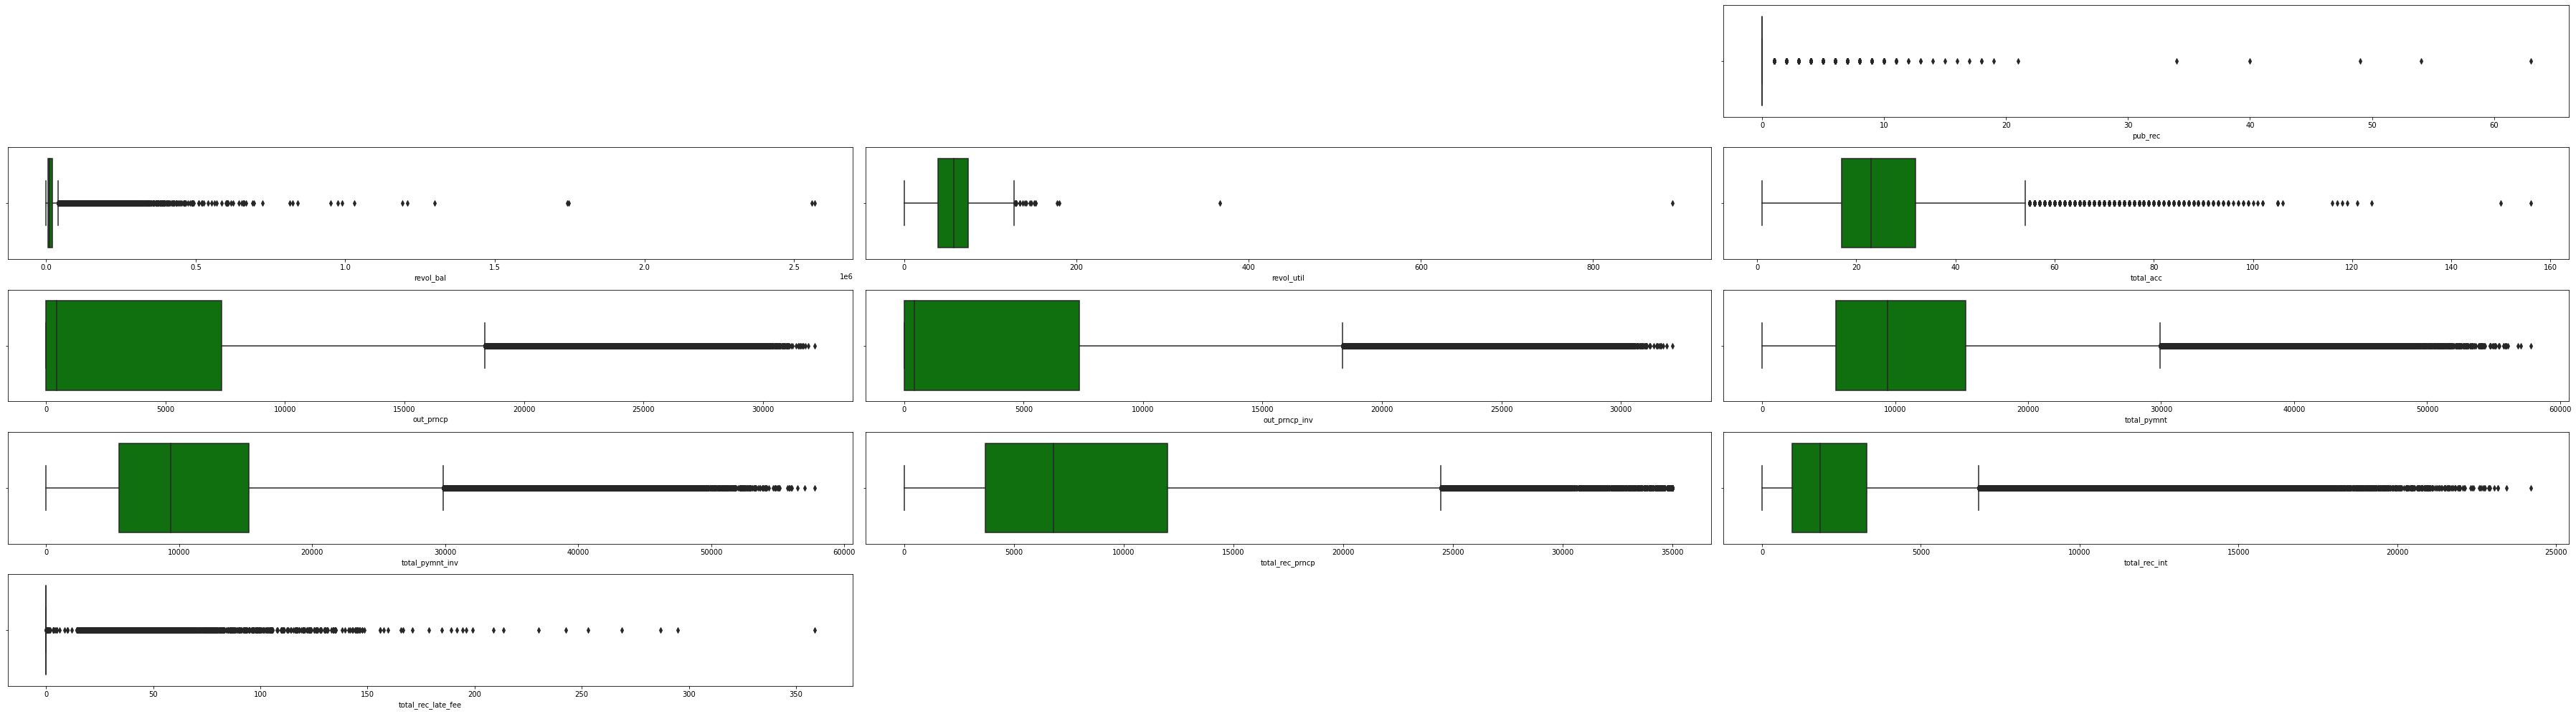

In [53]:
plt.figure(figsize=(50, 30))
for i in range(11, 22):
    plt.subplot(11, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='Green')
    plt.tight_layout()

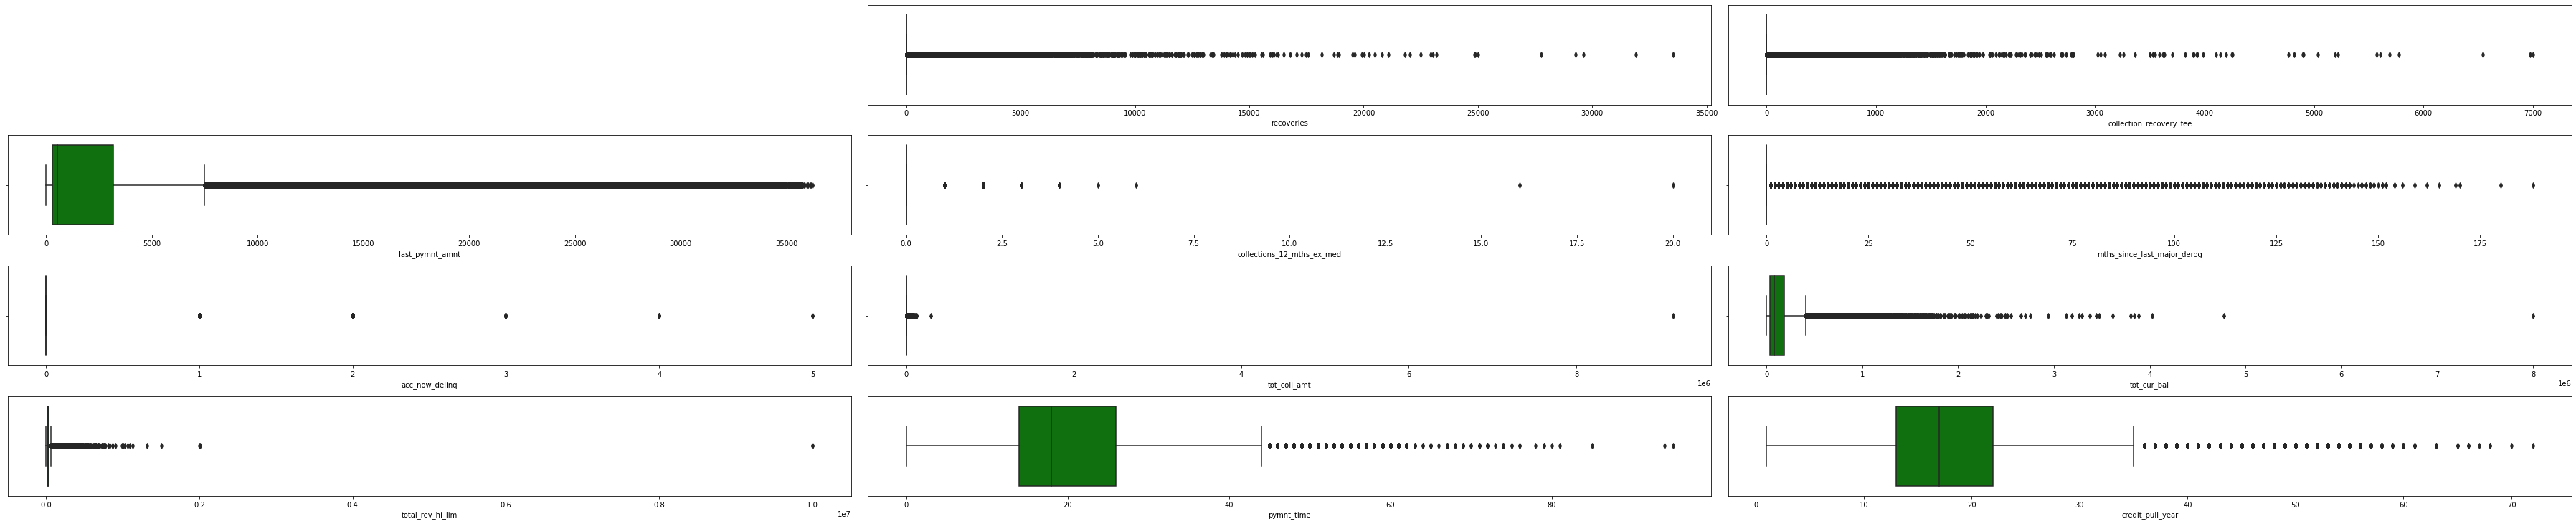

In [54]:
plt.figure(figsize=(50, 30))
for i in range(22, 33):
    plt.subplot(12, 3, i+1)
    sns.boxplot(uni_dist.iloc[:,i], color='Green')
    plt.tight_layout()

*   Berdasarkan grafik diatas, dapat dilihat bahwa beberapa feature memiliki outlier
(installment, annual_inc, open_acc, revol_bal, total_pymnt_inv, out_prncp, total_rec_late_fee, out_prncp_inv, total_rec_prncp, total_pymnt, total_acc, total_rec_int, last_pymnt_amnt, total_rev_hi_lim, recoveries, total_coll_amt, pymnt_time, collection_recovery_fee, tot_cur_bal, credit_pull_year)
*   beberapa feature yang tidak memiliki outliers (loan_amnt,funded_amnt,funded_amnt_inv,int_rate)

##Correlation Analysis for Feature Selection

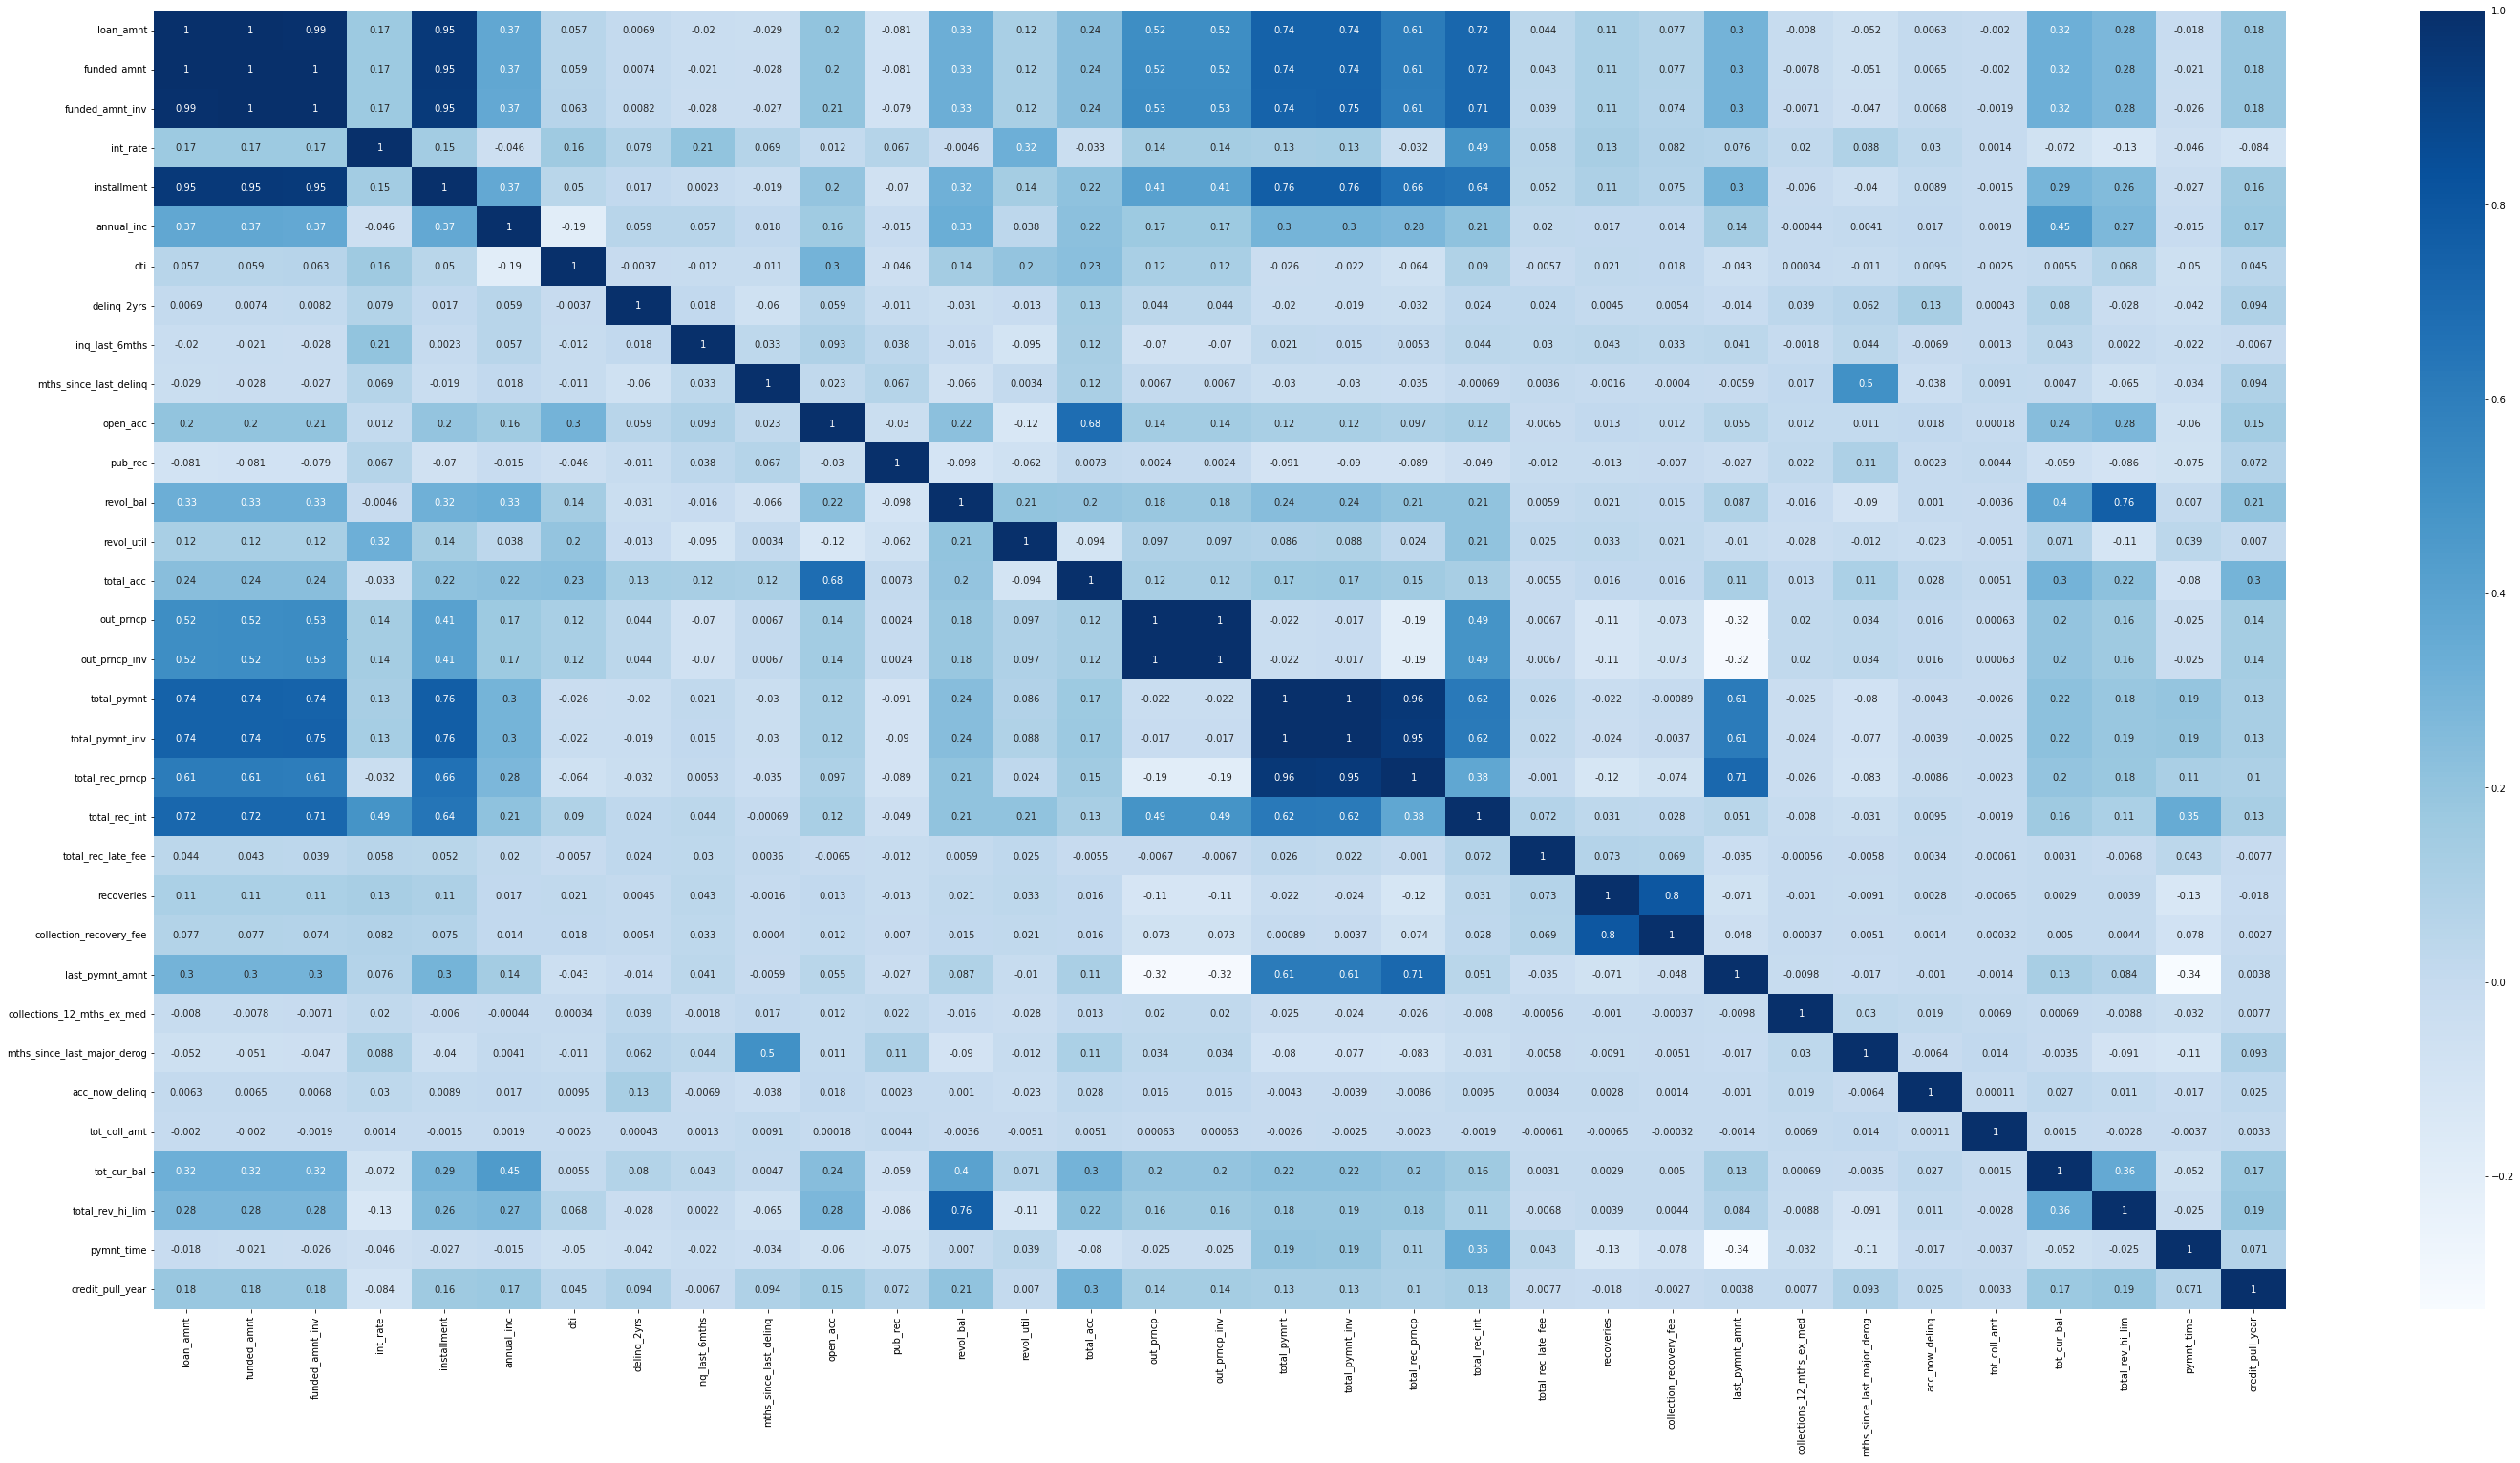

In [55]:
non_used = ['Unnamed: 0','id','member_id','policy_code','loan_status']
uni_dist = df_cred.select_dtypes(include=[np.float64,np.int64])
uni_dist = uni_dist[uni_dist.columns[~uni_dist.columns.isin(non_used)]]
fig = plt.figure(figsize = (50,25))
sns.heatmap(uni_dist.corr(),cmap='Blues', annot = True)

In [56]:
def top_correlation (df,n):
    corr_matrix = df.corr()
    correlation = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
    correlation = pd.DataFrame(correlation).reset_index()
    correlation.columns=["Variable_1","Variable_2","Correlation"]
    correlation = correlation.reindex(correlation.Correlation.abs().sort_values(ascending=False).index).reset_index().drop(["index"],axis=1)
    return correlation.head(n)
print("High Correlated Features (Corr > 0.5)")
top_correlation(uni_dist,39)

High Correlated Features (Corr > 0.5)


,Variable_1,Variable_2,Correlation
0,out_prncp,out_prncp_inv,0.999998
1,loan_amnt,funded_amnt,0.998548
2,funded_amnt,funded_amnt_inv,0.996125
3,total_pymnt,total_pymnt_inv,0.995862
4,loan_amnt,funded_amnt_inv,0.994347
5,total_pymnt,total_rec_prncp,0.956658
6,total_pymnt_inv,total_rec_prncp,0.952158
7,funded_amnt,installment,0.951787
8,loan_amnt,installment,0.949666
9,funded_amnt_inv,installment,0.947387


In [57]:
df_corr = top_correlation(uni_dist,41)
df_corr.to_excel('df_corr_3.xlsx', index=False)
!cp 'df_corr_3.xlsx' '/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/'
print('done')

done


In [58]:
uni_dist.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20


*   application_type hanya memiliki 1 nilai unik
*   emp_title, url,title, zip_code, earliest_cr_line memiliki lebih dari 500 nilai unik
*   last_credit_pull_d,last_pymnt_d,issue_d,addr_state memiliki paling banyak 50 unique values (dibawah 500)




In [59]:
removed_unused = ['Unnamed: 0','id','member_id','policy_code','emp_title','url','title','zip_code','earliest_cr_line']
multicol = ['last_credit_pull_d','last_pymnt_d','issue_d','addr_state','application_type',
            'out_prncp_inv','funded_amnt','total_pymnt_inv','funded_amnt_inv','total_rec_prncp','out_prncp',
            'revol_bal','total_pymnt','recoveries','total_rec_int','total_acc','loan_amnt']
removed_all = removed_unused + multicol

In [60]:
df_cred_a = df_cred[df_cred.columns[~df_cred.columns.isin(removed_all)]].reset_index(drop=True)
df_cred_b = df_cred[df_cred.columns[~df_cred.columns.isin(removed_unused)]].reset_index(drop=True)


In [61]:
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20


In [62]:
df_cred_b.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,credit_card,AZ,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,car,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,small_business,IL,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,49,20


In [63]:
df_cred_a.to_csv('df_cred_a.csv', index=False)
!cp 'df_cred_a.csv' '/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/'
print('done')

df_cred_b.to_csv('df_cred_b.csv', index=False)
!cp 'df_cred_b.csv' '/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/'
print('done')

done
done


##Categorical Encoding

In [64]:
df_cred_a = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/df_cred_a.csv')
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20


In [65]:
df_cred_b = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/df_cred_b.csv')
df_cred_b.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,credit_card,AZ,27.65,0.0,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,car,GA,1.00,0.0,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,small_business,IL,8.72,0.0,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,other,CA,20.00,0.0,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,other,OR,17.94,0.0,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,0.0,0.0,INDIVIDUAL,0.0,0.0,81539.0,22800.0,49,20


In [66]:
df_cred_a["term"].unique()

array([' 36 months', ' 60 months', '36 months'], dtype=object)

In [67]:
def text_num(text):
  return [int(s) for s in text.split() if s.isdigit()][0]

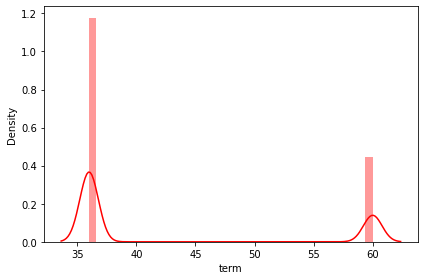

In [68]:
sns.distplot(df_cred_a["term"].apply(lambda x: text_num(x)), color='Red')
plt.tight_layout()
plt.show()

In [69]:
df_cred_a["term"] = df_cred_a["term"].apply(lambda x: text_num(x))
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20


In [70]:
df_cred_a["grade"].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [71]:
#Define a dictionary for encoding ordinal variable
target_dict = {'A':6,
               'B':5,
               'C':4,
               'D':3,
               'E':2,
               'F':1,
               'G':0}
#Create the mapped values in a new column
df_cred_a["grade"] = df_cred_a["grade"].map(target_dict)

In [72]:
df_cred_a.head()

,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,36,10.65,162.87,5,B2,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31
1,60,15.27,59.83,4,C4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14
2,36,15.96,84.33,4,C5,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15
3,36,13.49,339.31,4,C1,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19
4,60,12.69,67.79,5,B5,1 year,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20


In [73]:
df_cred_a["sub_grade"].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [74]:
def f_A(row):
    if row == 'A1':
        val = 1
    elif row == 'A2':
        val = 2
    elif row == 'A3':
        val = 3
    elif row == 'A4':
        val = 4
    elif row == 'A5':
        val = 5
    else:
        val = 0
    return val

def f_B(row):
    if row == 'B1':
        val = 1
    elif row == 'B2':
        val = 2
    elif row == 'B3':
        val = 3
    elif row == 'B4':
        val = 4
    elif row == 'B5':
        val = 5
    else:
        val = 0
    return val

def f_C(row):
    if row == 'C1':
        val = 1
    elif row == 'C2':
        val = 2
    elif row == 'C3':
        val = 3
    elif row == 'C4':
        val = 4
    elif row == 'C5':
        val = 5
    else:
        val = 0
    return val

def f_D(row):
    if row == 'D1':
        val = 1
    elif row == 'D2':
        val = 2
    elif row == 'D3':
        val = 3
    elif row == 'D4':
        val = 4
    elif row == 'D5':
        val = 5
    else:
        val = 0
    return val

def f_E(row):
    if row == 'E1':
        val = 1
    elif row == 'E2':
        val = 2
    elif row == 'E3':
        val = 3
    elif row == 'E4':
        val = 4
    elif row == 'E5':
        val = 5
    else:
        val = 0
    return val

def f_F(row):
    if row == 'F1':
        val = 1
    elif row == 'F2':
        val = 2
    elif row == 'F3':
        val = 3
    elif row == 'F4':
        val = 4
    elif row == 'F5':
        val = 5
    else:
        val = 0
    return val

def f_G(row):
    if row == 'G1':
        val = 1
    elif row == 'G2':
        val = 2
    elif row == 'G3':
        val = 3
    elif row == 'G4':
        val = 4
    elif row == 'G5':
        val = 5
    else:
        val = 0
    return val

In [75]:
df_cred_a['SubGrade_A'] = df_cred_a["sub_grade"].apply(f_A)
df_cred_a['SubGrade_B'] = df_cred_a["sub_grade"].apply(f_B)
df_cred_a['SubGrade_C'] = df_cred_a["sub_grade"].apply(f_C)
df_cred_a['SubGrade_D'] = df_cred_a["sub_grade"].apply(f_D)
df_cred_a['SubGrade_E'] = df_cred_a["sub_grade"].apply(f_E)
df_cred_a['SubGrade_F'] = df_cred_a["sub_grade"].apply(f_F)
df_cred_a['SubGrade_G'] = df_cred_a["sub_grade"].apply(f_G)
df_cred_a = df_cred_a.drop(axis=1, columns="sub_grade")

In [76]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10+ years,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,< 1 year,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10+ years,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10+ years,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,60,12.69,67.79,5,1 year,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0


In [77]:
df_cred_a["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [78]:
#Encoding ordinal variable
target_dict = {'< 1 year':0,
               '1 year':1,
               '2 years':2,
               '3 years':3,
               '4 years':4,
               '5 years':5,
               '6 years':6,
               '7 years':7,
               '8 years':8, 
               '9 years':9,
               '10+ years':10}
#Create the mapped values in a new column
df_cred_a["emp_length"] = df_cred_a["emp_length"].map(target_dict)

In [79]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,0,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,60,12.69,67.79,5,1,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0


In [80]:
df_cred_a["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [81]:
df_cred_a["home_ownership"].value_counts()

MORTGAGE    235875
RENT        188473
OWN          41704
OTHER          182
NONE            50
ANY              1
Name: home_ownership, dtype: int64

ANY, OTHER, and NONE akan di agregrat ke dalam OTHER. Setelah itu, dilakukan One Hot Encoding

In [82]:
target_dict = {'MORTGAGE':'MORTGAGE',
               'RENT':'RENT',
               'OWN':'OWN',
               'OTHER':'OTHER',
               'ANY':'OTHER',
               'NONE':'OTHER'}
# Create the mapped values in a new column
df_cred_a["home_ownership"] = df_cred_a["home_ownership"].map(target_dict)

In [83]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G
0,36,10.65,162.87,5,10,RENT,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0
1,60,15.27,59.83,4,0,RENT,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0
2,36,15.96,84.33,4,10,RENT,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0
3,36,13.49,339.31,4,10,RENT,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0
4,60,12.69,67.79,5,1,RENT,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0


In [84]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["home_ownership"]]))
df_cred_a_encoded.columns = encoder.get_feature_names(["home_ownership"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["home_ownership"] ,axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,verification_status,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,36,10.65,162.87,5,10,24000.0,Verified,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,Source Verified,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0
2,36,15.96,84.33,4,10,12252.0,Not Verified,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,Source Verified,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0
4,60,12.69,67.79,5,1,80000.0,Source Verified,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,0.0,0.0,0.0,1.0


In [85]:
df_cred_a["verification_status"].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [86]:
df_cred_a["verification_status"].value_counts()

Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64

In [87]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["verification_status"]]))
df_cred_a_encoded.columns = encoder.get_feature_names(["verification_status"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["verification_status"] ,axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,n,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,n,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,n,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,n,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,60,12.69,67.79,5,1,80000.0,1,n,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [88]:
df_cred_a['pymnt_plan'].unique()

array(['n', 'y'], dtype=object)

In [89]:
#Define a dictionary for encoding ordinal variable
target_dict = {'n':0,
               'y':1}
#Create the mapped values in a new column
df_cred_a["pymnt_plan"] = df_cred_a["pymnt_plan"].map(target_dict)

In [90]:
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,purpose,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified
0,36,10.65,162.87,5,10,24000.0,1,0,credit_card,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,60,15.27,59.83,4,0,30000.0,0,0,car,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,small_business,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,other,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,60,12.69,67.79,5,1,80000.0,1,0,other,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [91]:
df_cred_a["loan_status"].unique()

array([1, 0])

In [92]:
df_cred_a["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [93]:
df_cred_a["purpose"].value_counts()

debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: purpose, dtype: int64

*   home_improvement, car, medical, wedding, moving, house, vacation, educational bisa di agregrat ke dalam private_use
*   renewable_energy bisa di agregrat ke dalam other

In [94]:
target_dict = {'debt_consolidation':'debt_consolidation',
               'credit_card':'credit_card',
               'home_improvement':'private_use',
               'other':'other',
               'major_purchase':'major_purchase',
               'small_business':'small_business',
               'car':'private_use',
               'medical':'private_use',
               'wedding':'private_use',
               'moving':'private_use',
               'house':'private_use',
               'vacation':'private_use',
               'educational':'private_use',
               'renewable_energy':'other'}

df_cred_a["purpose"] = df_cred_a["purpose"].map(target_dict)

In [95]:
df_cred_a["purpose"].value_counts()

debt_consolidation    274195
credit_card           104157
private_use            47051
other                  24041
major_purchase          9828
small_business          7013
Name: purpose, dtype: int64

In [96]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["purpose"]]))
df_cred_a_encoded.columns = encoder.get_feature_names(["purpose"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["purpose"] ,axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,initial_list_status,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,f,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,f,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,f,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,f,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60,12.69,67.79,5,1,80000.0,1,0,17.94,0.0,0.0,38.0,15.0,0.0,53.9,f,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [97]:
df_cred_a["initial_list_status"].unique()

array(['f', 'w'], dtype=object)

In [98]:
encoder = OneHotEncoder(sparse=False)
df_cred_a_encoded = pd.DataFrame(encoder.fit_transform(df_cred_a[["initial_list_status"]]))
df_cred_a_encoded.columns = encoder.get_feature_names(["initial_list_status"])
df_cred_a = pd.concat([df_cred_a, df_cred_a_encoded], axis=1)
df_cred_a.drop(["initial_list_status"] ,axis=1, inplace=True)
df_cred_a.head()

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,1,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,1,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,60,12.69,67.79,5,1,80000.0,1,0,17.94,0.0,0.0,38.0,15.0,0.0,53.9,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [99]:
df_cred_a.to_csv('df_cred_a_prep1.csv', index=False)
!cp 'df_cred_a_prep1.csv' '/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/'
print('done')

done


##Handling Outliers

In [100]:
df_cred_a = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/df_cred_a_prep1.csv')
df_cred_a.head(2)

,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,1,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.0,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.0,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [101]:
df_cred_a['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., 13., 15.,
       10., 12., 17., 18., 29., 24., 14., 21., 22., 19., 16.])

In [102]:
df_cred_a['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19.])

In [103]:
df_cred_a['open_acc'].unique()

array([ 3.,  2., 10., 15.,  9.,  7.,  4., 11., 14., 12., 20.,  8.,  6.,
       17.,  5., 13., 16., 30., 21., 18., 19., 27., 23., 34., 25., 22.,
       24., 26., 32., 28., 29., 33., 31., 39., 35., 36., 38., 44., 41.,
       42.,  1., 46., 37., 47., 40., 45., 49., 53., 51., 43.,  0., 62.,
       48., 50., 52., 54., 76., 58., 55., 84., 75., 61.])

In [104]:
df_cred_a['mths_since_last_major_derog'].unique()

array([  0.,  53.,  34.,  54.,  69.,   7.,  16.,  71.,  33.,  59.,  45.,
         8.,  56.,  11.,  50.,  47.,  64.,  32.,  62.,  39.,  70.,  76.,
        49.,  68.,  46.,  74.,  60.,  77.,  43.,  51.,  52.,  48.,  58.,
        10.,  72.,  19.,  27.,  22.,  23.,  40.,  57.,  35.,  61.,  73.,
        30.,  18.,  25.,  63.,  44.,  28.,  21.,  41.,  31.,  80.,  67.,
        65.,  13.,  26.,  75.,  15.,  12.,  14.,  81.,   5.,  29.,   6.,
        38.,  37.,  42.,   4.,  17.,   9.,  24.,  94., 138.,  66.,  79.,
        20.,  36., 110.,   1.,  84.,  55.,  78.,   2.,   3.,  82., 100.,
       111., 102.,  93., 135., 152.,  95.,  92., 115.,  86.,  88., 123.,
       106.,  83.,  87.,  85., 122.,  89., 109.,  91., 146., 134., 114.,
        99.,  97.,  96.,  90., 165., 127., 119., 101., 124., 129., 113.,
       120., 139., 131., 112., 156., 143., 149., 118., 130., 104., 148.,
       126., 141., 116., 133., 137., 108., 169.,  98., 103., 105., 125.,
       128., 142., 117., 132., 154., 121., 107., 14

In [105]:
len(df_cred_a['mths_since_last_major_derog'].unique())

162

In [106]:
#Bukan fitur numerik karena memiliki range
df_cred_a['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  9.,  8.,  7., 11., 49., 10.,
       54., 12., 18., 19., 16., 15., 14., 40., 63., 13., 21., 34., 17.])

In [107]:
#Bukan fitur numerik karena memiliki range
df_cred_a['collections_12_mths_ex_med'].unique() 

array([ 0.,  1.,  2.,  4.,  3.,  6., 16., 20.,  5.])

In [108]:
#Bukan fitur numerik karena memiliki range
df_cred_a['acc_now_delinq'].unique() 

array([0., 1., 2., 3., 5., 4.])

In [109]:
def subset_by_iqr(df, column):
    """Remove outliers from a dataframe by column, including optional 
       whiskers, removing rows for which the column value are 
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    Args:
        df (`:obj:pd.DataFrame`): A pandas dataframe to subset
        column (str): Name of the column to calculate the subset from.
        whisker_width (float): Optional, loosen the IQR filter by a
                               factor of `whisker_width` * IQR.
    Returns:
        (`:obj:pd.DataFrame`): Filtered dataframe
    """
    whisker_width=1.5
    # Calculate Q1, Q2 and IQR
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    # Apply filter with respect to IQR, including optional whiskers
    filter = (df[column] >= q1 - whisker_width*iqr) & (df[column] <= q3 + whisker_width*iqr)
    return df.loc[filter].reset_index(drop=True)

outliers:
* installment
* annual_inc
* open_acc
* total_rec_late_fee
* last_pymnt_amnt
* total_rev_hi_lim
* total_coll_amt
* collection_recovery_fee
* tot_cur_bal
* credit_pull_year


In [110]:
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
             
outlier = ['installment','annual_inc','open_acc','total_rec_late_fee','last_pymnt_amnt','total_rev_hi_lim',
           'tot_coll_amt','collection_recovery_fee','tot_cur_bal','pymnt_time','credit_pull_year']

In [111]:
#Example for whiskers = 1.5, as requested by the OP
print(f'Count of rows before removing outlier: {len(df_cred_a)}')
for i in outlier:
  df_cred_a_out = subset_by_iqr(df_cred_a, i) 
print(f'Count of rows after removing outlier: {len(df_cred_a_out)}')

Count of rows before removing outlier: 466285
Count of rows after removing outlier: 452787


##Training Test Split

# 70% Training + 30% Testing

In [112]:
#Separate features and target variables (df_train)
df_train_feat = df_cred_a_out.loc[:, df_cred_a_out.columns != "loan_status"]
df_train_target = df_cred_a_out["loan_status"]

In [113]:
df_train_feat.to_csv('df_train_feat.csv', index=False)
!cp 'df_train_feat.csv' '/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/'
print('done')

df_train_target.to_csv('df_train_target.csv', index=False)
!cp 'df_train_target.csv' '/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/'
print('done')

done
done


In [114]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target, test_size=0.3, 
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 282083, 0: 34867})
Class from testing data df_test Counter({1: 120894, 0: 14943})


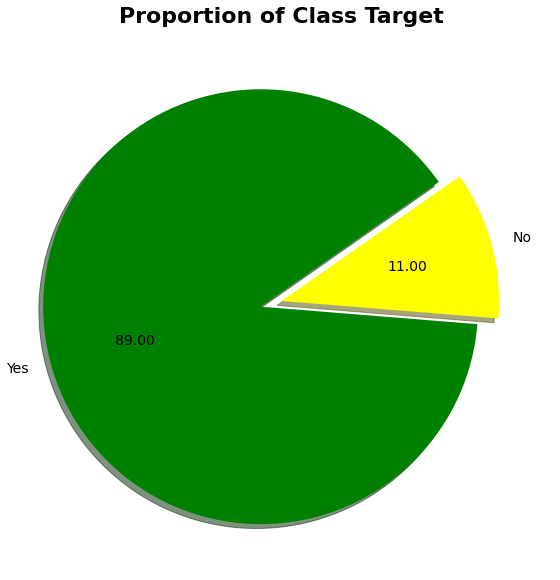

In [115]:
# Distribution of training target
plt.figure(figsize=(10,10))
plt.pie(
        y_train.value_counts(),
        autopct='%.2f',
        explode=[0.1,0],
        labels=["Yes","No"], 
        shadow=True, 
        textprops={'fontsize': 14},
        colors=["Green","Yellow"], 
        startangle=35)

plt.title("Proportion of Class Target",fontsize=22, fontweight='bold')
plt.show()

#Data Insight

In [116]:
df_cred = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/df_cred.csv')
df_cred.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Teacher,10+ years,RENT,24000.0,Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,0.0,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,31
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,0,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,1999-04-01,5.0,0.0,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,16,14
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Teacher,10+ years,RENT,12252.0,Not Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,2001-11-01,2.0,0.0,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,30,15
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,1996-02-01,1.0,35.0,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,2015-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,37,19
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,2011-12-01,1,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,1996-01-01,0.0,38.0,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-01-01,0.0,0.0,1,INDIVIDUAL,0.0,0.0,81539.0,22800.0,49,20


In [117]:
df_cred = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/df_cred.csv')
df_cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    466285 non-null  object 
 12  emp_length                   466285 non-null  object 
 13 

##Does the employment length have an impact to good or bad loan?

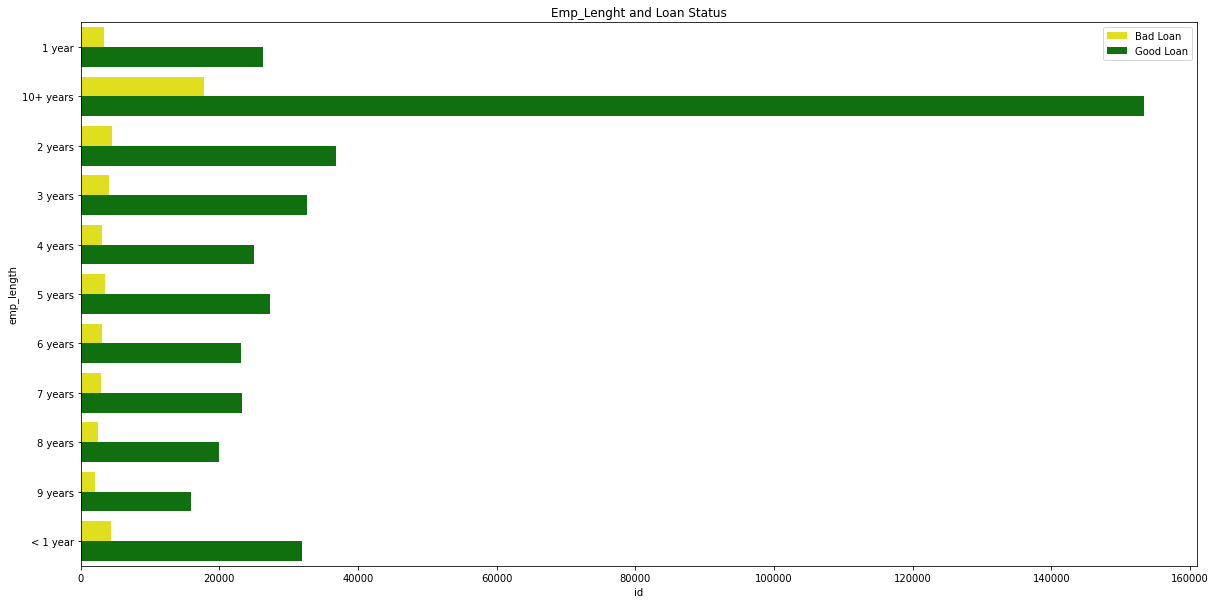

In [118]:
plt.figure(figsize=(20,10))
emp_lenght_loan = df_cred.groupby(['emp_length', 'loan_status'])['id'].count().reset_index()
# plot with seaborn barplot
p = sns.barplot(data=emp_lenght_loan, x='id', y='emp_length', hue='loan_status',palette=['Yellow','Green'])
plt.title("Emp_Lenght and Loan Status")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

##Why do our borrower take credit loan?


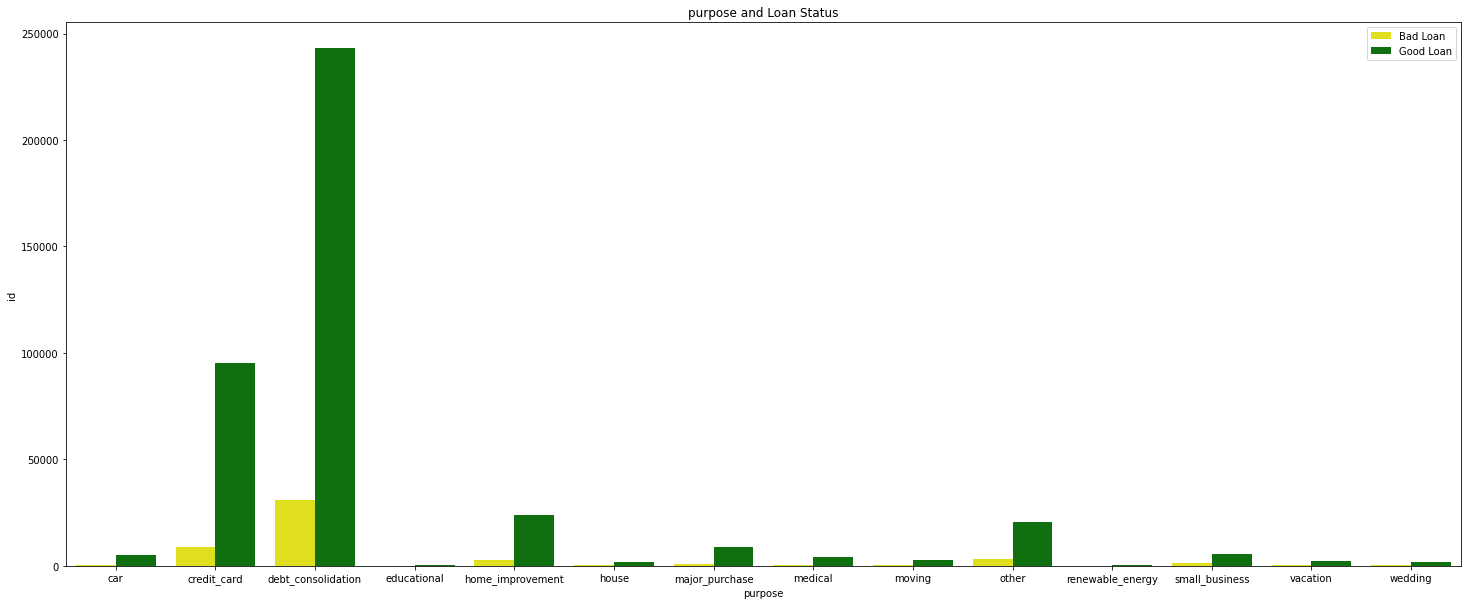

In [122]:
plt.figure(figsize=(25,10))
purpose_loan = df_cred.groupby(['purpose', 'loan_status'])['id'].count().reset_index()
# plot with seaborn barplot
p = sns.barplot(data=purpose_loan, x='purpose', y='id', hue='loan_status',palette=['Yellow','Green'])
plt.title("purpose and Loan Status")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

##What can be concluded from good or bad loans based on their number of payments on the loan (term)?

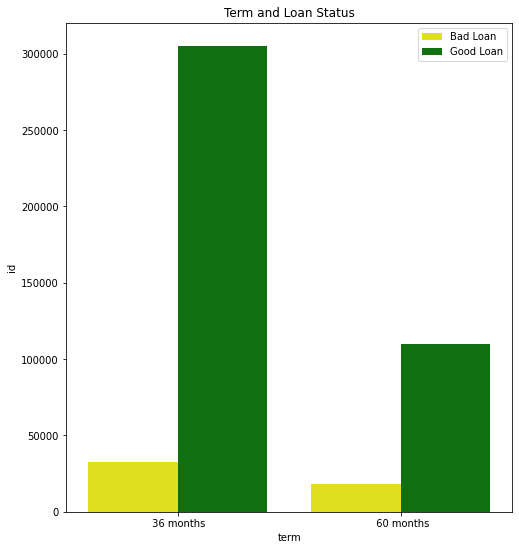

In [120]:
plt.figure(figsize=(8,9))
term_loan = df_cred.groupby(['term', 'loan_status'])['id'].count().reset_index()
# plot with seaborn barplot
p = sns.barplot(data=term_loan, x='term', y='id', hue='loan_status',palette=['Yellow','Green'])
plt.title("Term and Loan Status")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

##How about classifying grade towards our borrower and the loan status?

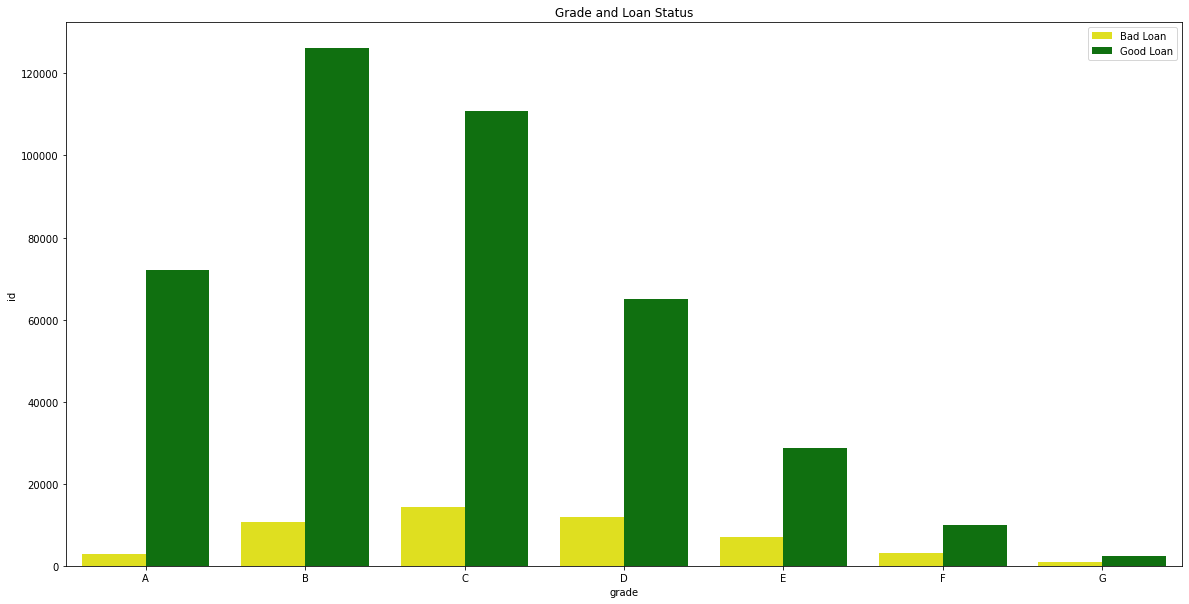

In [121]:
plt.figure(figsize=(20,10))
grade_loan = df_cred.groupby(['grade', 'loan_status'])['id'].count().reset_index()
# plot with seaborn barplot
p = sns.barplot(data=grade_loan, x='grade', y='id', hue='loan_status',palette=['Yellow','Green'])
plt.title("Grade and Loan Status")
legend_labels, _= p.get_legend_handles_labels()
p.legend(legend_labels,['Bad Loan', 'Good Loan'])
plt.show(p)

#Data Modelling

In [123]:
df_train_feat = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/df_train_feat.csv')
df_train_feat.head()

,term,int_rate,installment,grade,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_util,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,pymnt_time,credit_pull_year,SubGrade_A,SubGrade_B,SubGrade_C,SubGrade_D,SubGrade_E,SubGrade_F,SubGrade_G,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_major_purchase,purpose_other,purpose_private_use,purpose_small_business,initial_list_status_f,initial_list_status_w
0,36,10.65,162.87,5,10,24000.0,0,27.65,0.0,1.0,0.0,3.0,0.0,83.7,0.00,0.00,171.62,0.0,0.0,0.0,0.0,81539.0,22800.0,37,31,0,2,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,60,15.27,59.83,4,0,30000.0,0,1.00,0.0,5.0,0.0,3.0,0.0,9.4,0.00,1.11,119.66,0.0,0.0,0.0,0.0,81539.0,22800.0,16,14,0,0,4,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,36,15.96,84.33,4,10,12252.0,0,8.72,0.0,2.0,0.0,2.0,0.0,98.5,0.00,0.00,649.91,0.0,0.0,0.0,0.0,81539.0,22800.0,30,15,0,0,5,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,36,13.49,339.31,4,10,49200.0,0,20.00,0.0,1.0,35.0,10.0,0.0,21.0,16.97,0.00,357.48,0.0,0.0,0.0,0.0,81539.0,22800.0,37,19,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,60,12.69,67.79,5,1,80000.0,0,17.94,0.0,0.0,38.0,15.0,0.0,53.9,0.00,0.00,67.79,0.0,0.0,0.0,0.0,81539.0,22800.0,49,20,0,5,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [124]:
df_train_target = pd.read_csv('/content/drive/MyDrive/RAKAMIN/VIX_IDX Partners/Dataset/df_train_target.csv')
df_train_target['loan_status']

0         1
1         0
2         1
3         1
4         1
         ..
452782    1
452783    0
452784    1
452785    1
452786    1
Name: loan_status, Length: 452787, dtype: int64

In [125]:
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train_feat, df_train_target['loan_status'], test_size=0.3, 
                                                    random_state=42, stratify=df_train_target)
print('Class from training data df_train',Counter(y_train))

print('Class from testing data df_test',Counter(y_test))

Class from training data df_train Counter({1: 282083, 0: 34867})
Class from testing data df_test Counter({1: 120894, 0: 14943})


In [126]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE

def log_transform(x):
  return np.log(x + 1)

# Pipeline to transform the numerical features
numerical = ['int_rate','installment','annual_inc','dti','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
             'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
             'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
skewed = ['installment','annual_inc','delinq_2yrs','inq_last_6mths','mths_since_last_delinq','open_acc',
          'revol_util','total_rec_late_fee','collection_recovery_fee','last_pymnt_amnt','mths_since_last_major_derog','tot_coll_amt',
          'tot_cur_bal','total_rev_hi_lim','pymnt_time','credit_pull_year']
diff = list(set(numerical) - set(skewed))

smt = SMOTE(random_state=42)
ss = StandardScaler()
log_transformer = FunctionTransformer(log_transform) # remainder='passthrough'

numerical_transformer = Pipeline([('log', log_transformer),('ss', ss)])
ct = ColumnTransformer([('num_transformer', numerical_transformer, skewed), ('scaler', ss, diff)], remainder='passthrough')

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [128]:
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    return ks.statistic, roc_auc

In [129]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

##Logistic Regression

Training is success!
ROC AUC: 0.9381
KS: 0.7337 (p-value: 0.000e+00)
Classification report Logistic Regression : 
               precision    recall  f1-score   support

           0       0.56      0.81      0.66     14943
           1       0.98      0.92      0.95    120894

    accuracy                           0.91    135837
   macro avg       0.77      0.87      0.80    135837
weighted avg       0.93      0.91      0.92    135837



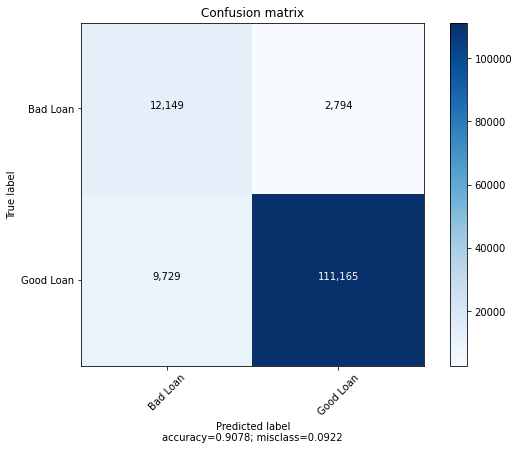

In [130]:
model_LR = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('LR', LogisticRegression(random_state=42) )
          ])
model_LR.fit(X_train, y_train) 
print("Training is success!")
y_pred = model_LR.predict_proba(X_test)
predicted = model_LR.predict(X_test)

#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Logistic Regression : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

In [131]:
len(model_LR.named_steps['LR'].coef_[0])

47

##Random Forest

Training is success!
ROC AUC: 0.9499
KS: 0.7597 (p-value: 0.000e+00)
Classification report Random Forest Classifier : 
               precision    recall  f1-score   support

           0       0.92      0.69      0.79     14943
           1       0.96      0.99      0.98    120894

    accuracy                           0.96    135837
   macro avg       0.94      0.84      0.88    135837
weighted avg       0.96      0.96      0.96    135837



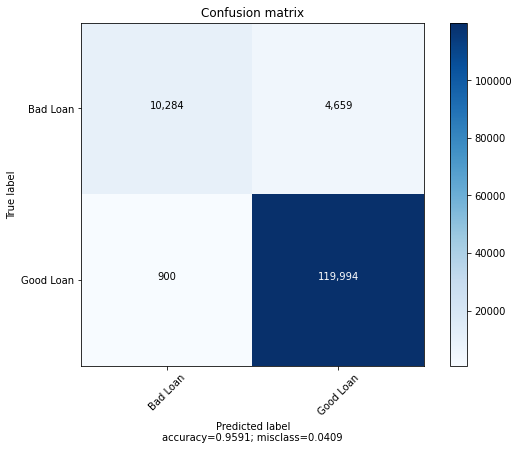

In [132]:
model_RF = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('RF', RandomForestClassifier(random_state=42) )
          ])
model_RF.fit(X_train, y_train) 
print("Training is success!")
y_pred = model_RF.predict_proba(X_test)
predicted = model_RF.predict(X_test)
#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Random Forest Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

##XGBoost Classifier

Training is success!
ROC AUC: 0.9421
KS: 0.7226 (p-value: 0.000e+00)
Classification report XGBoost Classifier : 
               precision    recall  f1-score   support

           0       0.87      0.70      0.77     14943
           1       0.96      0.99      0.98    120894

    accuracy                           0.96    135837
   macro avg       0.92      0.84      0.87    135837
weighted avg       0.95      0.96      0.95    135837



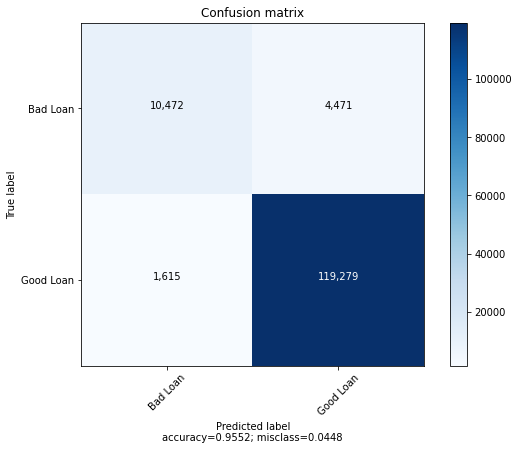

In [133]:
model_XGB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('XGB', xgb.XGBClassifier(objective="binary:logistic",random_state=42) )
          ])
model_XGB.fit(X_train, y_train) 
print("Training is success!")
y_pred = model_XGB.predict_proba(X_test)
predicted = model_XGB.predict(X_test)

#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report XGBoost Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

##Voting Classifier

Training is success!
ROC AUC: 0.9491
KS: 0.7536 (p-value: 0.000e+00)
Classification report Voting Classifier : 
               precision    recall  f1-score   support

           0       0.82      0.74      0.78     14943
           1       0.97      0.98      0.97    120894

    accuracy                           0.95    135837
   macro avg       0.89      0.86      0.88    135837
weighted avg       0.95      0.95      0.95    135837



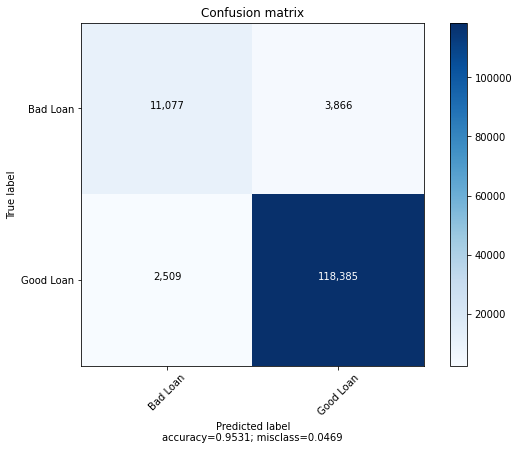

In [134]:
from sklearn.ensemble import VotingClassifier

clf0 = GradientBoostingClassifier(random_state=42)
clf1 = RandomForestClassifier(random_state=42)
clf2 = LogisticRegression(random_state=42)
clf3 = xgb.XGBClassifier(objective="binary:logistic",random_state=42)

# Main pipeline for fitting.
model_VC = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('VC', VotingClassifier(estimators=[('GB', clf0),('RF', clf1), ('LR', clf2), ('XGB', clf3)],
                        voting='soft', weights=[1,1,2,1]) )
          ])
model_VC.fit(X_train, y_train) 
print("Training is success!")
y_pred = model_VC.predict_proba(X_test)
predicted = model_VC.predict(X_test)

#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Voting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

##Gradient Boosting Classifier

Training is success!
ROC AUC: 0.9419
KS: 0.7227 (p-value: 0.000e+00)
Classification report Gradient Boosting Classifier : 
               precision    recall  f1-score   support

           0       0.86      0.70      0.77     14943
           1       0.96      0.99      0.97    120894

    accuracy                           0.95    135837
   macro avg       0.91      0.84      0.87    135837
weighted avg       0.95      0.95      0.95    135837



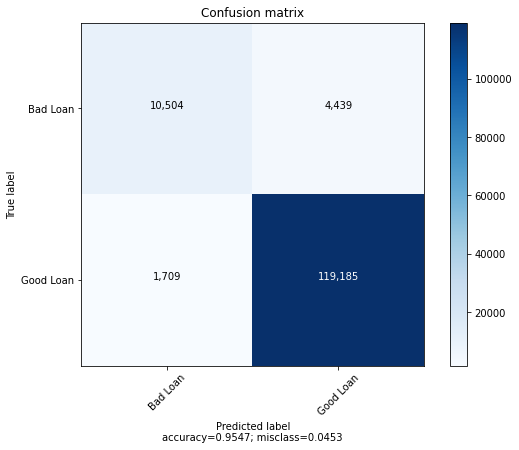

In [135]:
model_GB = Pipeline([
                   ('column_transformer', ct),
                   ('smt', smt),
                   ('GB', GradientBoostingClassifier(random_state=42) )
          ])
model_GB.fit(X_train, y_train) 
print("Training is success!")
y_pred = model_GB.predict_proba(X_test)
predicted = model_GB.predict(X_test)

#print AUC, KS score, and classification report
ks, auc = evaluate_ks_and_roc_auc(y_test, y_pred)
matrix = classification_report(y_test, predicted)
print('Classification report Gradient Boosting Classifier : \n',matrix)
cm = confusion_matrix(y_test, predicted)
target_names = ["Bad Loan","Good Loan"]
plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None,normalize=False)

#Model Interpretation

Top 10 Feature Importances in the Model

In [136]:
def compute_feature_importance(voting_clf, weights):
    """ Function to compute feature importance of Voting Classifier """
    
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

In [137]:
feature_importance = pd.DataFrame()
feature_importance['features'] = X_train.columns
feature_importance['importance'] = model_RF.named_steps['RF'].feature_importances_

<Figure size 2880x1440 with 0 Axes>

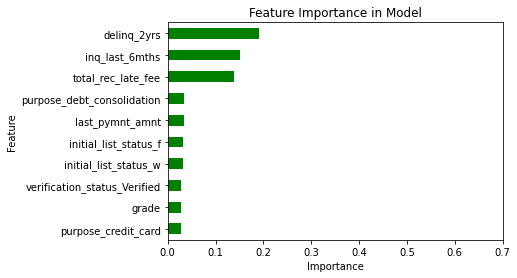

In [139]:
plt.figure(figsize=(40,20))
plot = feature_importance.sort_values('importance', ascending = False).head(10).plot.barh(color='Green',legend=None)
plot.set_yticklabels(feature_importance.sort_values('importance', ascending = False).head(10).features)
plt.title('Feature Importance in Model')
plt.xlim([0,0.7])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

Top 3 feature importances in predicting credit risk is good or bad:
* `delinq_2yrs`: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
* `inq_last_6mths`: Number of credit inquiries in past 12 months
* `total_rec_late_fee`: Late fees received to date